<a href="https://colab.research.google.com/github/sopranomax/DataScienceClasses/blob/main/AA_Review_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Supervised Learning
  + provide input features -> X and corresponding output / target labels -> y     
  + algorithm learns the underlying relationship from the model (train)
  + algorithm can predict response output from new input (test)

* *CART - Classification and Regression Tree* (from DataCamp)
  + *Objective: infer class labels*
  + *can capture non-linear relationships between features*
  + *don't require feature scaling*

* Regression - continuous variable, Linear Regression

* Classification - categorical variable (binary or multi-class), Logistic Regression

* Decision Tree - graph with nodes and edges, Regression (DecisionTreeRegressor) and Classification (DecisionTreeClassifier)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Decision Tree Classifier
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

names = ['id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave_points_mean', 'symmetry_mean', 
         'fractal_dimension_mean', 'radius_se', 'texture_se', 
         'perimeter_se', 'area_se', 'smoothness_se', 
         'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 
         'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 
         'fractal_dimension_worst'] 

data = pd.read_csv(UCI_data_URL, names=names)



In [ ]:
data.head()
data.shape

(569, 32)

In [ ]:
X = data.drop(['id_number', 'diagnosis'], axis=1)
y = data['diagnosis']
X.head()
y[0:10]
y = data['diagnosis'].map({'M':1, 'B':0})
y[0:10]
# Encode target variable benign = 0, malignant =1

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

* Decision Criteria
  + starts at the root node, data is split based on one of the features
  + criteria "gini" and "entropy" measure the degree of class purity
     + Entropy = - Σ*p*(x)log*p*(x), *p*(x) = fraction of examples in given class
  + start with high entropy ("disorder") of a heterogenous data set. We 
  + split the data to reduce entropy and gain information
     + the child nodes have more homogenous data
  + final nodes are the leaves without children
  + in classification - majority vote decides which class the leaf node represents
  + in regression - average of values is the predicted value

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/ns1.png">



In [ ]:
# split data into train & test, input & response
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9210526315789473

In [ ]:
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy

0.9210526315789473

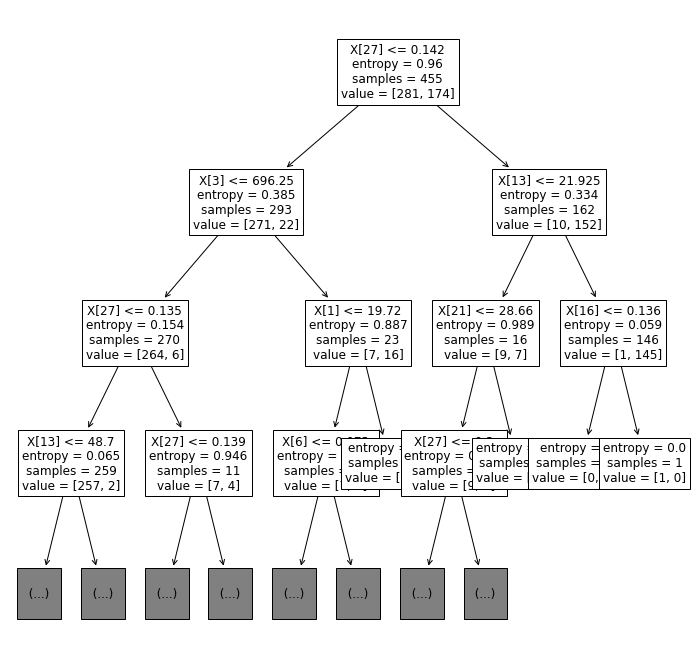

In [ ]:
# Decision Tree plot

from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

* Ensemble Methods
  + The Wisdom of the Crowd: Ask each of your friends to guess the price of an item. The average of their guesses is closer to the true price than each of the individual guesses.
  + use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone


* **Randomforest** - Random forests or random decision forests 
  + ensemble learning method for classification, regression and other tasks 
  + constructing multitude of decision trees at training time
  + Each tree splits a random subset of the features
  + output the class that is the mode of the classes (classification) or 
  + mean/average prediction (regression) of the individual trees


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100,
                            random_state=11)
rf_cl.fit(X_train, y_train)
rf_pred= rf_cl.predict(X_test)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.956140


* **Boosting** - ensemble method that changes a set of weak learners into strong learners
  + errors of the previous learner are given more weight and become the focus of the next learner

* **XGBoost** - optimized distributed gradient boosting library,implements machine learning algorithms under the Gradient Boosting framework. 

In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99) 
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.947368


* Cross-Validation - method of rotating training and test subsets of the data
  + algorithm is more robust when it comes to generalizations i.e. testing on unseen data

<img src="https://www.researchgate.net/publication/326465007/figure/fig1/AS:649909518757888@1531961912055/Ten-fold-cross-validation-diagram-The-dataset-was-divided-into-ten-parts-and-nine-of.png">

In [ ]:
#DMatrix is a internal data structure that used is by XGBoost 
# which is optimized for both memory efficiency and training speed
data_dmatrix = xgb.DMatrix(data=X,label=y) 
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,num_boost_round=10, metrics="error", as_pandas=True) 
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

Accuracy: 0.952502


In [ ]:
#*Regression - target is a continuous variable

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data,boston.target,test_size=0.3,random_state=99)

reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=99)
DecisionTreeRegressor()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

DecisionTreeRegressor()

In [ ]:
X=boston.data
y=boston.target
RMSE_CV = - cross_val_score(reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv= 10)
reg.fit(X_train, y_train)
y_pred_test = reg.predict(X_test)

#  RMSE for CV
print('CV RMSE: {:.2f}'.format(RMSE_CV.mean()))

# Test RMSE
print('Test RMSE: {:.2f}'.format(MSE(y_test, y_pred_test, squared=False)))


CV RMSE: 5.53
Test RMSE: 5.41


In [ ]:

boston_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"reg:squarederror","max_depth":4, "alpha":1}
cv_results = xgb.cv(dtrain=boston_dmatrix, params=params,nfold=4,num_boost_round=10,metrics="rmse",as_pandas=True,seed=99)
cv_results["test-rmse-mean"].tail(1).values[0]


3.539434

In [ ]:
# Linear Regression
%matplotlib inline
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Scikit Learn accepts Numpy arrays as well as Pandas data frames
print(boston.keys())
X = boston.data
print("X shape ", X.shape, type(X))
y = boston.target
print("y shape ", y.shape)

print(boston.DESCR)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
X shape  (506, 13) <class 'numpy.ndarray'>
y shape  (506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres


In [ ]:
# split data into train and test
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=9)

# instantiate linear regression
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

print ("X, y train shape: ", X_train.shape, y_train.shape)
print ("X, y test shape: ", X_test.shape, y_test.shape)

# fit the training data to the model
LinReg.fit(X_train, y_train)

# predict the test data 
y_predicted = LinReg.predict(X_test)



X, y train shape:  (354, 13) (354,)
X, y test shape:  (152, 13) (152,)


In [ ]:
# measure accuracy using mean square error (MSE)
# using Numpy
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

# using sklearn metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

19.295749073363368
19.295749073363368


In [ ]:
print ("error on the training data = ", 
      mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)), "\n")

# How much does the model (the x variable) explain the variability of the response data around its mean?
print(LinReg.score(X_test, y_test), "\n")

print(LinReg.coef_, "\n")

print(LinReg.intercept_)

error on the training data =  23.16855850467137 

0.7826126074271011 

[-1.10653650e-01  4.35058932e-02  5.27220034e-02  2.23444360e+00
 -1.58398648e+01  3.89237897e+00  1.01476364e-03 -1.32124422e+00
  2.84930457e-01 -1.15585903e-02 -9.02839713e-01  8.45742872e-03
 -5.27607786e-01] 

33.23779607719034


(array([ 3.,  9., 30., 63., 21., 13.,  7.,  2.,  2.,  2.]),
 array([-10.49760771,  -7.67103817,  -4.84446863,  -2.0178991 ,
          0.80867044,   3.63523998,   6.46180952,   9.28837905,
         12.11494859,  14.94151813,  17.76808767]),
 <a list of 10 Patch objects>)

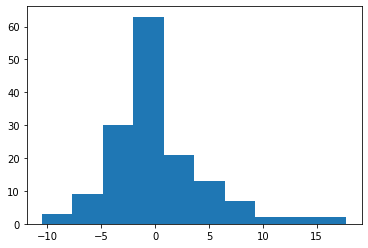

In [ ]:
# histogram of residuals - does it satisfy the assumptions for inference?
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted)

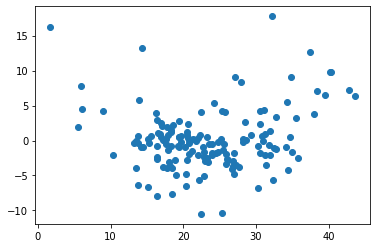

In [ ]:
plt.scatter(y_predicted, y_test - y_predicted)

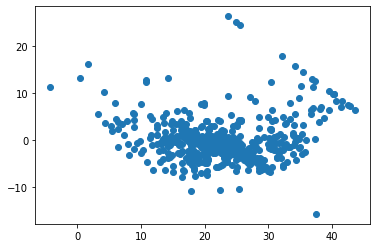

In [ ]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

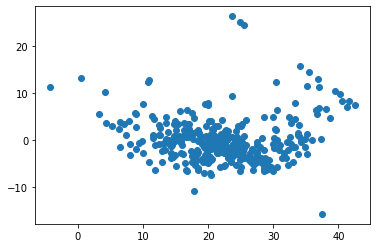

In [ ]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

* Logistic Regression - Classification problem
  + discrete (qualitative, categorigal) target variable


In [ ]:
# Logistic Regression 

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing

diab_df = pd.read_csv("diabetes.csv")
#diab_df.head()

X = diab_df.iloc[:,0:-1] 
y = diab_df.Outcome 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# instatiate the logistic regression
LogReg = LogisticRegression()

# preprosses, train and predict
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)

print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_, "\n" )

print("Accuracy", LogReg.score(X_test, y_test), "\n")
print(classification_report(y_test, LogReg.predict(X_test)))

Classes [0 1]
Intercept [-0.8106916]
Coefficients [[ 0.29286006  1.03288106 -0.20519002  0.09191431 -0.11308546  0.68771364
   0.29190585  0.26366929]] 

Accuracy 0.8020833333333334 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



* Confusion Matrix
  + Accuracy = (tp + tn)/(p + n)
  + Sensitivity, Recall or True Positve Rate (TPR) = tp/p = tp/(tp + fn) 
  + Specificity (SPC) or True Negative Rate = tn/n = tn/tn + fp
  + Precision or Positive Predictive Value (PPV): proportion of true positives PPV = tp/(tp + fp)
  + True Negative Rate (TNR) = tn/n = tn/(tn + fp) = 1 - FPR 
  + False Positive Rate (FPR) = fp/n = fp/(fp + tn) - 1 = TNR

* F1 Score is measure of accuracy
  + harmonic mean of precision and recall (sensitivity)
  
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9c94f59b68f5ae0dc92185906c7ec4214fd04e1e">


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


[[118  12]
 [ 26  36]] 



Text(0.5, 257.44, 'Predicted label')

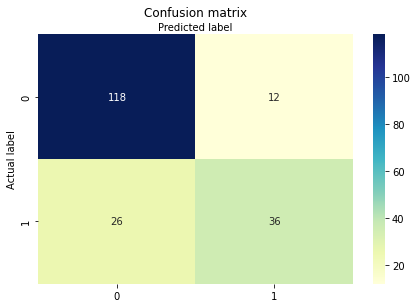

In [ ]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat, "\n")

categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

* Class bias - imbalance between positive cases and negative cases in the data
  + Dummy Classifier - dummy algorithm most frequent predictor

In [ ]:
# Dummy classifier in SKlearn
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

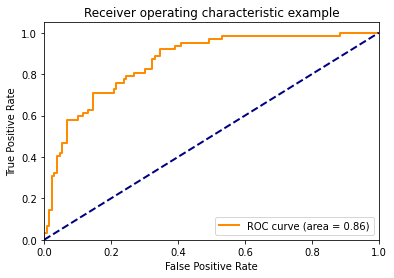

In [ ]:
# ROC curve and AUROC
y_pred_proba = LogReg.predict_proba(X_test)[::,1]   # probability of trues
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<img src = "https://i.pinimg.com/originals/5d/90/79/5d9079798db012ca2af8806d7d211fdf.png" >

* Derivation of Bayes Theorem
<img src="https://sites.google.com/site/artificialcortext/_/rsrc/1270096677974/others/mathematics/bayes-theorem/bayes-der.jpg">

* Frequentist - probability is the proportion of times an event occurs (frequency)
  + classical statistics
    + p-value, confidence intervals, null hypothesis testing
  + hypothesis is either true or false
  + use maximum of liklihoods P(D|H) to choose a hypothesis

* Bayesian - probability is quantification of personal belief
  + assign a probability to
    + a hypothesis or population parameter
    + events that are not repeatable
    + events that happened in the past
  + probability of a hypothesis is updated as new evidence is found

Example:
P(test positive | sick person) = 0.99
P(test negative | healthy person) = 0.98
P(sick person) = 0.001  (disease prevalence)

If test is positive, what is the probability person is sick?

P(person sick | test positive) = P(test positive| person sick)*P(person sick) / p(test positive)

denominator: P(test positive) = P(test positive | person sick) * P(person sick) + P(test positive | person healthy) * P(person healthy) = 
(0.99 * 0.001 + 0.02 * 0.999) = 0.02097

P(person sick | test positive) = (0.99 * 0.001) / 0.02097 = 0.0472 or 4.7%


#Example from DataCamp
* Calculate and print the unconditional probability of spam

p_spam = emails["spam"].mean()  
print(p_spam)

* Calculate and print the unconditional probability of "!!!"

p_3_excl = emails["contains_3_excl"].mean()  
print(p_3_excl)

* Calculate and print the probability of "!!!" given spam

p_3_excl_given_spam = emails.loc[emails["spam"]]["contains_3_excl"].mean()  
print(p_3_excl_given_spam)

* Calculate and print the probability of spam given "!!!"

p_spam_given_3_excl = p_3_excl_given_spam * p_spam / p_3_excl  
print(p_spam_given_3_excl)

In [ ]:
# Three competing hypothesis
# 0 ->fair coin HT
# 1-> two heads coin HH
# 2 -> two tils coin TT
# one coin chosen randomly and tossed
# lands heads up, which coin was chosen?

# Prior P(H)
prior = np.array([1/3,1/3,1/3])   # each coin has equal prob. of being chosen

# Likelihood P(D|H)
# Likelihood for heads: P(heads | first coin) = 1/2; P(heads | second coin) = 1; P(heads|third coin) = 0
likelihood_h = np.array([1/2,1,0])

# Likelihood for tails 
likelihood_t = np.array([1/2,0,1])

# Posterior P(H|D) = likelihood * Prior / P(D)

# We observe heads H:
# We update our probability for each hypothesis in light of the new evidence. Change your mind !
posterior = list([1/3,1/3,1/3])
for i in range(3):
    posterior[i] = likelihood_h[i] * prior[i]  / np.sum(likelihood_h * prior)
print(posterior) 


[0.3333333333333333, 0.6666666666666666, 0.0]


The probability of the first coin didn't change. The probability of the second coin doubled. The probability of the third coin changed to zero. If we observe heads, it can be the two tails coin.

In [ ]:
# We observe again heads H. The previous posterior is the new prior. Again we change our minds!
prior = posterior
for i in range(3):
    posterior[i] = likelihood_h[i] * prior[i]  / np.sum(likelihood_h * prior)
print(posterior)

[0.2, 0.8695652173913043, 0.0]


The probability of the first coin decreases, that of the second coin increases, and third coin stays zero.

In [ ]:
# We observe again heads H. The previous posterior is the new prior
prior = posterior
for i in range(3):
    posterior[i] = likelihood_h[i] * prior[i]  / np.sum(likelihood_h * prior)
print(posterior)

[0.1031390134529148, 0.9440152397079056, 0.0]


Now it looks like the first coin is improbable (p=0.103) and the second coin is almost certain (p=0.944). It is certainly not the third coin (p=0).

What happens if the friend tosses the coin one more time and it lands tails up?

In [ ]:
# We observe tails T. The previous posterior is the new prior.
prior = posterior
for i in range(3):
    posterior[i] = likelihood_t[i] * prior[i]  / np.sum(likelihood_t * prior)
print(posterior)

[1.0, 0.0, 0.0]


The improbable first coin with heads and tails must be the truth (p=1), since the others were eliminated as impossible (p=0)

* Monty Hall Problem
 + 3 doors, pick a door
 + 1 door is revealed
 + it is to your advantage to switch, Pr(win) = 2/3

In [ ]:
# Frequentist simulation (repeated trials)
# import numpy as np

no_change_strategy_wins = 0
change_strategy_wins = 0

all_doors = [1,2,3]

for i in range(10000):
  first_time_pick = np.random.choice(all_doors)
  door_with_car = np.random.choice(all_doors)    
  all_doors_n = all_doors.copy()
  if first_time_pick == door_with_car:
    x = all_doors_n.remove(first_time_pick)
    monty_opens_door = np.random.choice(all_doors_n)
  else:
    remain_doors = all_doors_n.remove(first_time_pick)
    w = all_doors_n.remove(door_with_car)
    monty_opens_door =  np.random.choice(all_doors_n) 
  second_time_pick = first_time_pick
  if (second_time_pick == door_with_car): 
    no_change_strategy_wins = no_change_strategy_wins + 1  
  all_doors_n1 = all_doors.copy() 
  # Always change strategy
  some_doors = all_doors_n1.remove(first_time_pick)
  y = all_doors_n1.remove(monty_opens_door)
  second_time_pick = all_doors_n1
  if (second_time_pick == door_with_car): 
     change_strategy_wins=change_strategy_wins + 1

print(change_strategy_wins/10000)
print(no_change_strategy_wins/10000)

0.6698
0.3302


Bayesian Solution
Let us assume (without loss of generality) that you pick door 1 and the host Monty opens door 2.

Let A be the event that the car is in door 1

Let B be the event that the car is in door 2

Let C be the event that the car is in door 3

Let D be the event that Monty opens door 2

According to Bayes, the probabilty of car in door 1 given Monty opens door 2 is: P(A|D) = P(D|A)*P(A) / P(D)

Let us work on the denominator P(D) = P(D|A)*P(A) + P(D|B)P(B) + P(D|C)P(C)

We got the algebra of Bayes rule, but what do these terms stand for.

Let us begin with the numerator: P(D|A) means the probability that Monty opens door 2 given the car is in door 1. This is 1/2, since Monty can choose either of the remaining doors with the goats. Also, P(A) = 1/3, since the car can be in any door equally likely. So the numerator is 1/2 * 1/3 = 1/6

Now the terms of the denominator:

P(D|A)*P(A) is same as the numerator; it is 1/6

P(D|B)P(B) : First P(D|B) means the probability that Monty opens door 2 given the car is in door 2. That is impossible. Why would he show where the car is? So P(D|B) = 0 and P(D|B)P(B) = 0*1/3 = 0

P(D|C)P(C): First P(D|C) means the probability that Monty opens door 2 given the car is in door 3. That is certain, since he cannot open the door with the car (3). He is forced to open door 2 with a goat. So P(D|B ) = 1 and P(D|C)P(C) = 1*1/3 = 1/3.

Now we have the values of all terms, so P(A|D) = 1/6 / (1/6 + 0 + 1/3) = 1/3

A similar calculation shows that P(C|D) = 2/3 or you can see that P(C|D) = 1 - P(A|D) = 1 - 1/3 = 2/3

Switching has P = 2/3 and sticking to first choice has p = 1/3

In [ ]:
# Bayesian Ridge Regression

from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)
print(reg.predict([[1, 0.]]))
print(reg.coef_)

[0.50000013]
[0.49999993 0.49999993]
